In [1]:
import sys
import random
import pandas as pd
from sklearn.metrics import classification_report
import json

sys.path.append('..')
import calc_metrics

C:\Users\fschr\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load Predictions and gold

In [2]:
fn_pred = "../../experiments/subtask3/experiment_scibert_uncased/prediction_force_one.txt"
fn_gold = "../../data/subtask3/subtask3_test.labels.txt"


preds = calc_metrics.parse_content(calc_metrics.load_relation_info(fn_pred))
gold = calc_metrics.parse_content(calc_metrics.load_relation_info(fn_gold))
print(len(preds), len(gold))

335 330


In [3]:
keys = set(preds.keys())|set(gold.keys())
gold_aligned, preds_aligned = [], []
for key in keys:
    g = gold.get(key, "nil")
    p = preds.get(key, "nil")
    gold_aligned.append(g)
    preds_aligned.append(p) 

In [4]:
len(gold_aligned), len(preds_aligned)

(362, 362)

## Calculate Metrics

In [10]:
labels = ['Abbreviation_of', 'AlternativeName_of', 'Citation_of', 'Developer_of',
       'Extension_of', 'License_of', 'PlugIn_of', 'Release_of',
       'Specification_of', 'URL_of', 'Version_of']
metrics_df = pd.DataFrame(classification_report(gold_aligned, preds_aligned, output_dict=True, labels=labels)).T
# Reset the index to make 'nil' accessible as a column
metrics_df.reset_index(inplace=True)

# Filter out rows where the index column has the value 'nil'
# metrics_df = metrics_df[metrics_df['index'] != 'nil']

# Set the index back to its original form
metrics_df.set_index('index', inplace=True)
metrics_df


,precision,recall,f1-score,support
index,,,,
Abbreviation_of,1.000000,1.000000,1.000000,5.0
AlternativeName_of,1.000000,1.000000,1.000000,1.0
Citation_of,0.933333,0.933333,0.933333,45.0
Developer_of,0.951807,0.951807,0.951807,83.0
Extension_of,0.785714,1.000000,0.880000,11.0
License_of,0.818182,1.000000,0.900000,9.0
PlugIn_of,0.769231,0.769231,0.769231,13.0
Release_of,0.857143,0.857143,0.857143,7.0
Specification_of,0.625000,0.625000,0.625000,8.0


In [11]:
metrics_df = metrics_df.iloc[:-3]

In [12]:
metrics_df

,precision,recall,f1-score,support
index,,,,
Abbreviation_of,1.000000,1.000000,1.000000,5.0
AlternativeName_of,1.000000,1.000000,1.000000,1.0
Citation_of,0.911111,0.911111,0.911111,45.0
Developer_of,0.951807,0.951807,0.951807,83.0
Extension_of,0.818182,0.818182,0.818182,11.0
License_of,0.818182,1.000000,0.900000,9.0
PlugIn_of,0.714286,0.769231,0.740741,13.0
Release_of,1.000000,1.000000,1.000000,7.0
Specification_of,0.666667,0.500000,0.571429,8.0


<Figure size 1400x800 with 0 Axes>

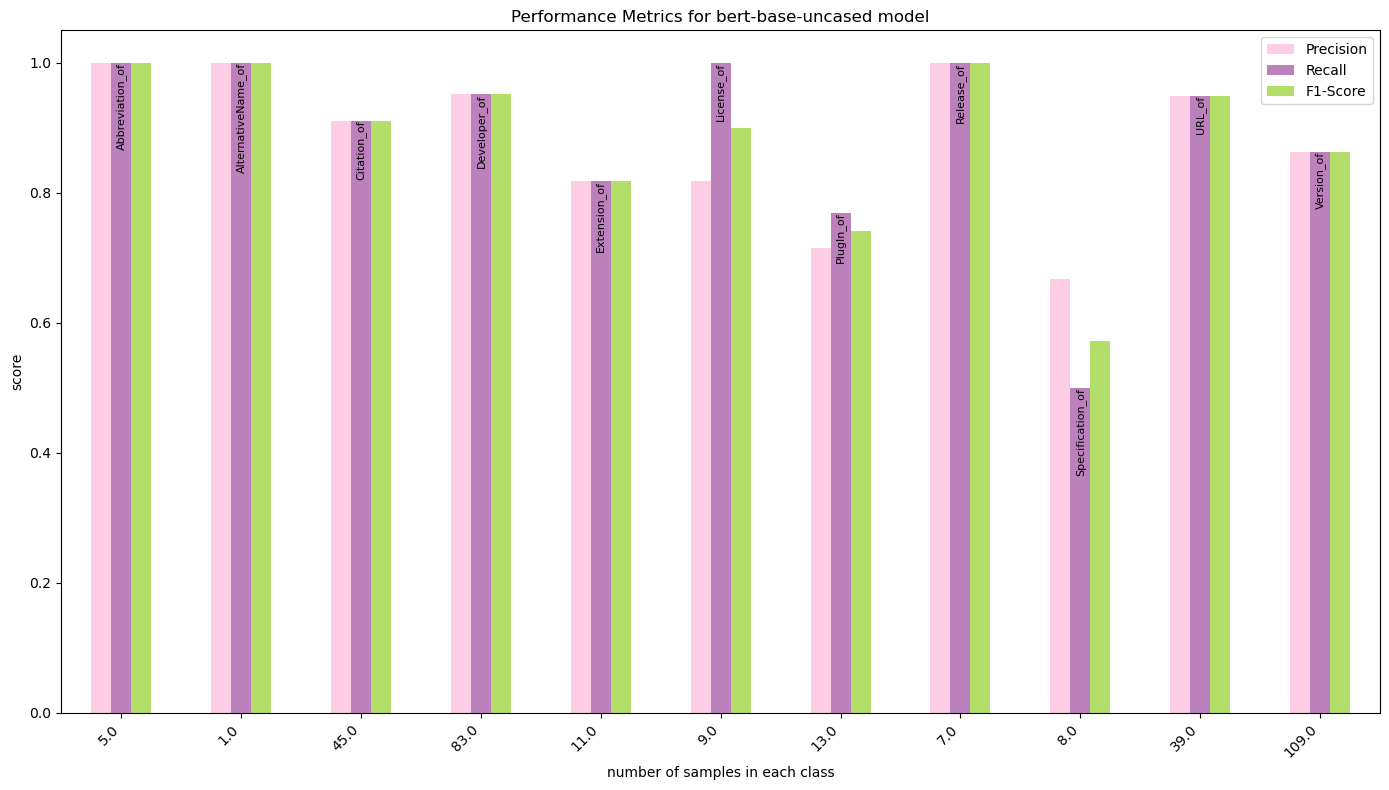

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = sns.color_palette('Set3')
colors_list = [colors[7], colors[9], colors[6]]
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Plotting the precision, recall, and f1-score
ax = metrics_df.plot(kind='bar', x='support', y=['precision', 'recall', 'f1-score'], color=colors_list, figsize=(14, 8))

# Adding title and labels
plt.title('Performance Metrics for bert-base-uncased model')
plt.xlabel('number of samples in each class')
plt.ylabel('score')

for i in range(len(metrics_df)):
    p = ax.containers[1][i]  # Select the middle bar in each group
    class_name = metrics_df.index[i]  # Get the class name for the current group
    ax.text(x=p.get_x() + p.get_width() / 2, 
            y=p.get_height() if p.get_height() != 0 else 0.2 ,  # Position slightly above the bar#+ 0.02
            s=class_name, 
            ha='center', va='top', rotation=90, fontsize=8, color='black')
# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# plt.legend(['Precision', 'Recall', 'F1-Score'], loc=(0.45, 0.5))
plt.legend(['Precision', 'Recall', 'F1-Score'], loc='upper right')
# Show the plot
plt.tight_layout()
plt.show()

In [13]:
result = metrics_df.loc["weighted avg"].drop("support").to_dict()

In [14]:
result

{'precision': 0.8380602684223855,
 'recall': 0.841225626740947,
 'f1-score': 0.8390992923753007}

In [15]:
result['name'] = 'bert-base-cased'
# result['negative_sampling_ratio'] = '16_1'
# result['epochs'] = hyperparameter['num_train_epochs']
# result['train_batch_size'] = hyperparameter['per_device_train_batch_size'] * hyperparameter['gradient_accumulation_steps']
# result['val_batch_size'] = hyperparameter['per_device_eval_batch_size']
# result['lr'] = hyperparameter['learning_rate']
# result['weight_decay'] = hyperparameter['weight_decay']
# result['warmup_ratio'] = hyperparameter['warmup_ratio']

In [16]:
result

{'precision': 0.8380602684223855,
 'recall': 0.841225626740947,
 'f1-score': 0.8390992923753007,
 'name': 'bert-base-cased'}

In [17]:
with open("subtask3_all_model_comparison_results_force_one.txt", "a") as myfile:
    myfile.write(json.dumps(result) + '\n')